In [31]:
# # Import libraries
# import numpy as np 
# from typing import Optional
# import copy
# from collections import defaultdict
# from collections import deque

# Backtracking

**Example 1: 46. Permutations**

Given an array nums of distinct integers, return all the possible permutations in any order.

For example, given nums = [1, 2, 3], return [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]].

In [6]:
nums = [1, 2, 3]
answer = [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

def find_all_permutations(nums):

    len_nums = len(nums)
    all_permutations = []

    def add_number_or_return_permutation(current_permutation):

        if len(current_permutation) == len_nums:
            all_permutations.append(current_permutation[:])
            # base case: permutation contains all the numbers => complete the permutation

        for num in nums:
            if num not in current_permutation: # could use a seen set instead for efficiency 
                current_permutation.append(num)
                add_number_or_return_permutation(current_permutation) # modify in place
                current_permutation.pop()

    current_permutation = []
    add_number_or_return_permutation(current_permutation)

    return all_permutations

answer = find_all_permutations(nums)
print(answer)


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


**Example 2: 78. Subsets**

Given an integer array nums of unique elements, return all subsets in any order without duplicates.

For example, given nums = [1, 2, 3], return [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

In [16]:
nums = [1, 2, 3]
answer = [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

def find_all_subsets(nums):
    
    list_of_subsets = []

    def expand_or_return_subset(current_subset):

        if current_subset not in list_of_subsets:
            list_of_subsets.append(current_subset.copy())

        for num in nums:
            if num not in current_subset:
                current_subset.add(num)
                expand_or_return_subset(current_subset)
                current_subset.remove(num)

    current_subset = set()
    expand_or_return_subset(current_subset)

    subsets_as_lists = [list(x) for x in list_of_subsets]

    return subsets_as_lists

answer = find_all_subsets(nums)
print(answer)

# More efficient to loop over a ragged array: 

# for j in range(i, len(nums)):
#     curr.append(nums[j])
#     backtrack(curr, j + 1)
#     curr.pop()

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]


Example 3: 77. Combinations

Given two integers n and k, return all combinations of k numbers out of the range [1, n] in any order.

For example, given n = 4, k = 2, return [[2,4],[3,4],[2,3],[1,2],[1,3],[1,4]].

In [24]:
n = 4
k = 2
answer = [[2,4],[3,4],[2,3],[1,2],[1,3],[1,4]]

def return_all_k_combinations(n, k):

    all_combos = []

    def expand_or_return_combo(current_combo, i):

        if len(current_combo) == k:
            all_combos.append(current_combo[:])

        for num in range(i, n + 1):
            if num not in current_combo:
                current_combo.append(num)
                expand_or_return_combo(current_combo, i + 1)
                current_combo.pop()

    current_combo = []
    expand_or_return_combo(current_combo, 1)

    return all_combos

answer = return_all_k_combinations(n, k)
print(answer)

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]


**797. All Paths From Source to Target**
Medium

Given a directed acyclic graph (DAG) of n nodes labeled from 0 to n - 1, find all possible paths from node 0 to node n - 1 and return them in any order.

The graph is given as follows: graph[i] is a list of all nodes you can visit from node i (i.e., there is a directed edge from node i to node graph[i][j]).

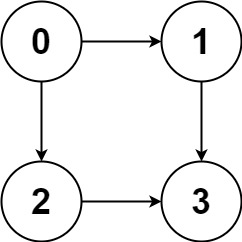

Example 1:


Input: graph = [[1,2],[3],[3],[]]
Output: [[0,1,3],[0,2,3]]
Explanation: There are two paths: 0 -> 1 -> 3 and 0 -> 2 -> 3.

In [9]:
def find_all_paths_to_final_node(graph):

    final_node = len(graph) - 1
    paths_list = []

    def extend_or_complete_path(current_path):

        current_node = current_path[-1]

        # base case: complete
        if current_node == final_node:
            paths_list.append(current_path[:])

        # recursive case: extend
        neighbours_current_node = graph[current_node]
        for neighbour in neighbours_current_node:
            if neighbour not in current_path:
                current_path.append(neighbour)
                extend_or_complete_path(current_path)
                current_path.pop()

    current_path = [0] # start at first node
    extend_or_complete_path(current_path) # modifies paths_list in place

    return paths_list

# example 1
answer = find_all_paths_to_final_node(graph)
print(answer)
graph = [[1,2],[3],[3],[]]
# [[0,1,3],[0,2,3]]

# example 2
graph = [[4,3,1],[3,2,4],[3],[4],[]]
answer = find_all_paths_to_final_node(graph)
print(answer)
# [[0,4],[0,3,4],[0,1,3,4],[0,1,2,3,4],[0,1,4]]

[[0, 1, 3], [0, 2, 3]]
[[0, 4], [0, 3, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4], [0, 1, 4]]
